In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

%matplotlib inline

In [2]:
df = pd.read_csv("AnimeListOverview.csv")
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
df.drop(['title_english', 'title_japanese', 'title_synonyms', 'image_url', 'source', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'scored_by','rank', 'popularity', 'favorites', 'premiered', 'broadcast', 'related', 'licensor', 'opening_theme', 'ending_theme'], axis=1, inplace=True)
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,26,7.89,204003,NaN,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,NaN,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,NaN,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen"


In [4]:
df.shape

(14478, 10)

In [5]:
df.isnull().sum()

anime_id          0
title             0
type              0
episodes          0
score             0
members           0
background    13421
producer       6190
studio         5934
genre            64
dtype: int64

<AxesSubplot:>

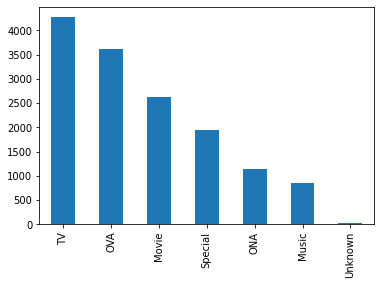

In [6]:
df['type'].value_counts().plot.bar()

In [7]:
df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre


In [8]:
missing = df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].copy()
missing.shape

(0, 10)

In [9]:
df.isnull().sum()

anime_id          0
title             0
type              0
episodes          0
score             0
members           0
background    13421
producer       6190
studio         5934
genre            64
dtype: int64

In [10]:
df[df['genre'].isnull()]

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
88,29765,Metropolis (2009),Movie,1,6.26,467,NaN,Mirai Film,NaN,NaN
135,32644,Yaseruyagi,ONA,1,4.03,100,NaN,NaN,NaN,NaN
745,29764,Blend,Movie,1,4.49,209,NaN,Mirai Film,NaN,NaN
1120,32636,Hokori Inu no Hanashi,ONA,1,5.54,125,NaN,NaN,NaN,NaN
1165,30055,Mabeob Chunjamun: Daemawangui Buhwaleul Magala,Movie,1,4.38,67,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14036,37018,Season&#039;s Greetings 2017 from Dwarf,ONA,1,4.39,46,NaN,NaN,dwarf,NaN
14115,37767,Xing Fu Lu Shang,Movie,1,4.50,37,NaN,NaN,NaN,NaN
14137,28487,Ikite Iru,OVA,1,5.60,62,NaN,NaN,NaN,NaN
14306,35722,Aesop Douwa,OVA,3,4.29,67,NaN,NaN,NaN,NaN


In [11]:
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer       True
studio         True
genre         False
dtype: bool

In [12]:
df['producer'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer      False
studio         True
genre         False
dtype: bool

In [13]:
df['studio'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer      False
studio        False
genre         False
dtype: bool

In [14]:
df['background'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background    False
producer      False
studio        False
genre         False
dtype: bool

In [15]:
#df.dropna(inplace=True)

In [16]:
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,26,7.89,204003,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,Unknown,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,Unknown,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen"


In [17]:
m = df.members.quantile(0.75)
C = df.score.mean()
print(m, C)

10379.0 6.142481696366902


In [18]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['score'] * term + (1-term) * C

In [19]:
df['community_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre,community_rating
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",7.577533
1,2104,Seto no Hanayome,TV,26,7.89,204003,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",7.805396
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,Unknown,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",7.368540
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",8.003051
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,Unknown,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",8.534178


In [20]:
#df['genre'] = df['genre'].apply(collapse)

In [21]:
#df['background'] = df['background'].apply(lambda x:x.split())

In [22]:
#df['tags'] = df['background'].append(df['genre']) 

In [23]:
df['tags'] = df['background'] + ' ' + df['genre'] 

In [24]:
new = df.drop(columns=['background','genre'])
new.head()

,anime_id,title,type,episodes,score,members,producer,studio,community_rating,tags
0,11013,Inu x Boku SS,TV,12,7.63,283882,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,7.577533,Inu x Boku SS was licensed by Sentai Filmworks...
1,2104,Seto no Hanayome,TV,26,7.89,204003,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,7.805396,"Unknown Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,"TV Tokyo, Sotsu",Satelight,7.368540,"Unknown Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,8.003051,Princess Tutu aired in two parts. The first pa...
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,"NHK, Shueisha",J.C.Staff,8.534178,"Unknown Comedy, Drama, Romance, Shounen"


In [25]:
df['tags']

0        Inu x Boku SS was licensed by Sentai Filmworks...
1         Unknown Comedy, Parody, Romance, School, Shounen
2                    Unknown Comedy, Magic, School, Shoujo
3        Princess Tutu aired in two parts. The first pa...
4                  Unknown Comedy, Drama, Romance, Shounen
                               ...                        
14473                                         Unknown Kids
14474                                       Unknown Comedy
14475           Unknown Action, Sci-Fi, Adventure, Fantasy
14476                                Unknown Fantasy, Kids
14477                                       Unknown Comedy
Name: tags, Length: 14478, dtype: object

In [26]:
#df['tags'] = df['tags'].apply(lambda x: " ".join(x))
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre,community_rating,tags
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",7.577533,Inu x Boku SS was licensed by Sentai Filmworks...
1,2104,Seto no Hanayome,TV,26,7.89,204003,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",7.805396,"Unknown Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,Unknown,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",7.368540,"Unknown Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",8.003051,Princess Tutu aired in two parts. The first pa...
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,Unknown,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",8.534178,"Unknown Comedy, Drama, Romance, Shounen"


In [27]:
tfidf = TfidfVectorizer(stop_words='english')
df['tags'] = df['tags'].fillna('')
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
tags_matrix = tfidf.fit_transform(df['tags'])
#Output the shape of tfidf_matrix
tags_matrix.shape

(14478, 5305)

In [28]:
tags_matrix

<14478x5305 sparse matrix of type '<class 'numpy.float64'>'
	with 80584 stored elements in Compressed Sparse Row format>

In [29]:
similarity_matrix = linear_kernel(tags_matrix,tags_matrix)
similarity_matrix

array([[1.        , 0.08017839, 0.01493479, ..., 0.        , 0.        ,
        0.04456555],
       [0.08017839, 1.        , 0.32484709, ..., 0.02545473, 0.03794956,
        0.31038256],
       [0.01493479, 0.32484709, 1.        , ..., 0.02748344, 0.0409741 ,
        0.33511972],
       ...,
       [0.        , 0.02545473, 0.02748344, ..., 1.        , 0.32500104,
        0.08201082],
       [0.        , 0.03794956, 0.0409741 , ..., 0.32500104, 1.        ,
        0.12226704],
       [0.04456555, 0.31038256, 0.33511972, ..., 0.08201082, 0.12226704,
        1.        ]])

In [30]:
anime_index = pd.Series(df.index, index=df.title).drop_duplicates()

In [31]:
def get_recommendation(anime_name, similarity=similarity_matrix):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result = df[['title', 'genre', 'community_rating', 'type', 'episodes', 'studio']].iloc[anime_indices].drop(idx)
    return result

In [32]:
get_recommendation("One Punch Man").sort_values('community_rating', ascending=False)

,title,genre,community_rating,type,episodes,studio
7066,Magi: The Kingdom of Magic,"Action, Adventure, Magic, Fantasy, Shounen",8.377727,TV,25,A-1 Pictures
8217,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Supernatural, Magic, Fantasy",8.332319,TV,13,ufotable
10989,One Punch Man Specials,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",7.717909,Special,6,Madhouse
7283,One Punch Man: Road to Hero,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",7.716529,OVA,1,Madhouse
6246,Rakudai Kishi no Cavalry,"Action, Romance, Ecchi, Fantasy, School",7.701954,TV,12,"Silver Link., Nexus"
3823,Kekkai Sensen,"Action, Comedy, Super Power, Supernatural, Vam...",7.686789,TV,12,Bones
13527,Yozakura Quartet: Hana no Uta,"Action, Comedy, Magic, Shounen, Super Power, S...",7.402576,TV,13,Tatsunoko Production
6722,Monster Musume no Iru Nichijou,"Harem, Comedy, Romance, Ecchi, Fantasy, Seinen",7.261059,TV,12,Lerche
13137,Nagato Yuki-chan no Shoushitsu,"Comedy, Romance, School, Seinen, Slice of Life",6.698983,TV,16,Satelight
2114,Comet Lucifer,"Action, Adventure, Fantasy, Mecha",5.971725,TV,12,8bit


In [33]:
import pickle

In [34]:
pickle.dump(new,open('anime_overview.pkl','wb'))
pickle.dump(similarity_matrix,open('similarity_overview.pkl','wb'))